## Limpeza dos Dados

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import locale

In [2]:
df = pd.read_csv('C:/Users/Phillipe/Projetos/FIAP ATIVIDADES/AULA 1/dados hospitais.csv', encoding='ISO-8859-1', skiprows=3, sep=';', 
                    skipfooter=12, thousands='.', decimal=',')

C:\Users\Phillipe\AppData\Local\Temp\ipykernel_31632\1267864106.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('C:/Users/Phillipe/Projetos/FIAP ATIVIDADES/AULA 1/dados hospitais.csv', encoding='ISO-8859-1', skiprows=3, sep=';',


In [3]:
df.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2024/Mai,2024/Jun,2024/Jul,2024/Ago,2024/Set,2024/Out,2024/Nov,2024/Dez,2025/Jan,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,14245430.08,13513718.18,15768573.38,14703987.50,14150716.10,13560840.74,9139104.31,6519383.53,2758684.28,1560284917.23
1,12 Acre,-,-,-,-,-,-,-,-,-,...,4988565.96,5264769.94,5030037.73,5142268.22,4684727.01,4602457.27,3925559.35,1415201.09,-,646620087.26
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,23374512.69,22127422.45,23608720.40,24321472.24,23723027.50,23091729.84,18975268.18,15476800.24,6664235.65,2888132298.30
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,3366624.22,3363751.20,3329894.41,2951150.34,2368791.93,1054670.97,787381.40,6307.79,-,489970130.16
4,15 Pará,-,-,-,-,-,-,-,-,-,...,56654098.57,52473874.98,55425739.44,53526292.16,57356780.09,58202601.03,47314110.27,35595477.64,14861885.10,6983761195.26


In [4]:
def df_informacoes(df):
    df_info = pd.DataFrame({'Não Nulos': df.notnull().sum(),
                'Nulos': df.isnull().sum(),
                '% Nulos': ((df.isnull().sum()/df.notnull().sum())*100).round(2),                         
                'Unicos': df.nunique(),                  
                'Dtype': df.dtypes})
    df_info.index.name = 'Columns'
    return df_info

In [5]:
df_informacoes(df)

,Não Nulos,Nulos,% Nulos,Unicos,Dtype
Columns,,,,,
Unidade da Federação,28,0,0.0,28,object
1992/Mar,28,0,0.0,2,object
1992/Abr,28,0,0.0,2,object
1993/Mai,28,0,0.0,2,object
1993/Dez,28,0,0.0,2,object
...,...,...,...,...,...
2024/Out,28,0,0.0,28,object
2024/Nov,28,0,0.0,28,object
2024/Dez,28,0,0.0,28,object


In [6]:
df_trans = df.T  # Transpor o DataFrame
df_trans = df_trans.rename(columns={"Unidade da Federação": "Datas"})

In [7]:
df_trans = df.T.reset_index()  # Transpor e resetar o índice
df_trans = df_trans.rename(columns={"index": "Datas"})  # Renomear a coluna de datas
df_trans.columns = df_trans.iloc[0]  # Definir a primeira linha como cabeçalho
df_trans = df_trans[1:].reset_index(drop=True)  # Remover a primeira linha e resetar o índice

# Remover os números e espaços em branco antes do nome dos estados
df_trans.columns = ["Datas"] + df_trans.columns[1:].str.extract(r'(\D+)$')[0].str.strip().tolist()
df_trans.tail()

,Datas,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,...,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal,Ignorado/exterior
327,2024/Out,13560840.74,4602457.27,23091729.84,1054670.97,58202601.03,4336396.75,9345504.78,43609705.31,21865890.66,...,142773517.13,447928600.94,171103139.87,135751413.24,132437000.00,25743057.05,26850694.38,49652238.35,32528006.84,-
328,2024/Nov,9139104.31,3925559.35,18975268.18,787381.40,47314110.27,3794028.79,6318575.89,36114501.96,17369877.05,...,109522394.10,387444440.51,139925364.31,114417047.85,103583124.61,18186248.86,20561114.34,44973037.35,29245003.46,-
329,2024/Dez,6519383.53,1415201.09,15476800.24,6307.79,35595477.64,3511515.03,4795457.30,28645837.82,14158169.45,...,85513544.90,324445311.14,115211619.99,82458534.29,74462448.83,12339588.67,15602957.81,39851862.13,24483952.98,-
330,2025/Jan,2758684.28,-,6664235.65,-,14861885.10,1870008.23,2558853.91,14167784.17,8661345.49,...,37940675.61,210480831.49,69078550.67,41423167.08,35442563.64,3611400.51,8479123.04,25809563.12,16764896.04,-
331,Total,1560284917.23,646620087.26,2888132298.30,489970130.16,6983761195.26,483661602.42,1492979261.92,5779843412.44,3329911635.55,...,15932166132.66,59610430175.39,21797575319.52,12284661079.47,18241384664.44,3553457995.83,3308268753.12,7343470595.15,3935843165.77,-


In [8]:
df_informacoes(df_trans)

,Não Nulos,Nulos,% Nulos,Unicos,Dtype
Columns,,,,,
Datas,332,0,0.0,332,object
Rondônia,332,0,0.0,213,object
Acre,332,0,0.0,213,object
Amazonas,332,0,0.0,216,object
Roraima,332,0,0.0,212,object
Pará,332,0,0.0,218,object
Amapá,332,0,0.0,215,object
Tocantins,332,0,0.0,217,object
Maranhão,332,0,0.0,221,object


In [9]:
# Remove a última coluna
df_trans = df_trans.iloc[:, :-1]

In [10]:
# Converter todas as colunas, exceto "Datas", para float
for col in df_trans.columns[1:]:  # Ignora a primeira coluna "Datas"
    df_trans[col] = df_trans[col].astype(str).replace('-', np.nan).astype(float)


In [11]:
# Definir o locale para reconhecer os meses em português
locale.setlocale(locale.LC_TIME, "pt_BR.UTF-8")

# Converter a coluna "Datas" para datetime corretamente
df_trans["Datas"] = pd.to_datetime(df_trans["Datas"], format="%Y/%b", errors="coerce")

In [12]:
df_informacoes(df_trans)

,Não Nulos,Nulos,% Nulos,Unicos,Dtype
Columns,,,,,
Datas,331,1,0.30,331,datetime64[ns]
Rondônia,212,120,56.60,212,float64
Acre,212,120,56.60,212,float64
Amazonas,215,117,54.42,215,float64
Roraima,211,121,57.35,211,float64
Pará,217,115,53.00,217,float64
Amapá,214,118,55.14,214,float64
Tocantins,216,116,53.70,216,float64
Maranhão,220,112,50.91,220,float64


Grande parte do dataframe estava com valores nulos 

In [13]:
# Obtém o número da coluna "Datas"
col_num = df_trans.columns.get_loc("Datas")
df_info = pd.DataFrame({"Datas": df_trans["Datas"], "Número da Coluna": col_num})
df_info


,Datas,Número da Coluna
0,1992-03-01,0
1,1992-04-01,0
2,1993-05-01,0
3,1993-12-01,0
4,1994-01-01,0
...,...,...
327,2024-10-01,0
328,2024-11-01,0
329,2024-12-01,0
330,2025-01-01,0


In [14]:
#Remove as colunas selecionadas - 1992 até 2007 e a linha do Total
df_trans = df_trans.drop(index=list(range(0, 126)) + [330,331]).reset_index(drop=True)

In [15]:
df_informacoes(df_trans)

,Não Nulos,Nulos,% Nulos,Unicos,Dtype
Columns,,,,,
Datas,204,0,0.0,204,datetime64[ns]
Rondônia,204,0,0.0,204,float64
Acre,204,0,0.0,204,float64
Amazonas,204,0,0.0,204,float64
Roraima,204,0,0.0,204,float64
Pará,204,0,0.0,204,float64
Amapá,204,0,0.0,204,float64
Tocantins,204,0,0.0,204,float64
Maranhão,204,0,0.0,204,float64


In [16]:
df_trans

Columns,Datas,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
0,2008-01-01,1829559.71,1731744.62,11419210.08,808448.39,21762104.16,1329876.61,5136474.61,21551600.33,11375419.37,...,16212109.41,2.534380e+08,1.116999e+09,5.808133e+07,5.303438e+07,5.106461e+07,8301006.10,8213438.64,81525475.93,10561085.46
1,2008-02-01,1940792.63,1743978.66,7934652.10,771687.83,20126081.01,1275063.72,5051932.07,13452263.93,9711680.20,...,10032886.43,4.412816e+07,1.736936e+08,4.885505e+07,2.440957e+07,4.589770e+07,8279288.79,7929894.93,18149374.27,10215956.80
2,2008-03-01,1955721.68,2057439.02,8641517.13,876091.18,22149375.82,1177745.93,5200151.87,14750895.33,10428191.09,...,12262049.08,4.293377e+07,1.709487e+08,5.561179e+07,2.748348e+07,5.292870e+07,9793888.78,9416367.68,20992213.03,11627918.26
3,2008-04-01,2143353.81,2057829.69,8531576.49,896952.53,23436682.75,1396371.51,5343714.73,15148647.11,10227943.00,...,12453466.98,4.532479e+07,1.706684e+08,5.611514e+07,2.780664e+07,5.197242e+07,8997542.75,9390588.03,21049477.30,11922015.36
4,2008-05-01,2280382.58,2226577.93,9079902.15,1027288.73,23861080.80,1411520.77,5344487.99,14543679.92,10562148.66,...,11789786.09,4.395135e+07,1.728103e+08,5.557483e+07,2.835428e+07,5.167935e+07,9842108.59,9378197.25,19162546.79,11900817.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2024-08-01,14703987.50,5142268.22,24321472.24,2951150.34,53526292.16,4211396.18,10251688.37,45981402.90,23776351.93,...,47339838.42,1.456726e+08,4.426515e+08,1.750943e+08,1.333501e+08,1.334163e+08,27527366.39,28306841.80,54385731.70,33791268.38
200,2024-09-01,14150716.10,4684727.01,23723027.50,2368791.93,57356780.09,4195741.10,10114640.44,45600967.69,23587479.21,...,45950101.54,1.381742e+08,4.331548e+08,1.700715e+08,1.288106e+08,1.265492e+08,27540863.66,26996002.44,50808426.77,32469797.15
201,2024-10-01,13560840.74,4602457.27,23091729.84,1054670.97,58202601.03,4336396.75,9345504.78,43609705.31,21865890.66,...,46194205.41,1.427735e+08,4.479286e+08,1.711031e+08,1.357514e+08,1.324370e+08,25743057.05,26850694.38,49652238.35,32528006.84
202,2024-11-01,9139104.31,3925559.35,18975268.18,787381.40,47314110.27,3794028.79,6318575.89,36114501.96,17369877.05,...,38788116.33,1.095224e+08,3.874444e+08,1.399254e+08,1.144170e+08,1.035831e+08,18186248.86,20561114.34,44973037.35,29245003.46


Agora restou apenas as datas que não possuem dados nulos

## Visualização do Dados

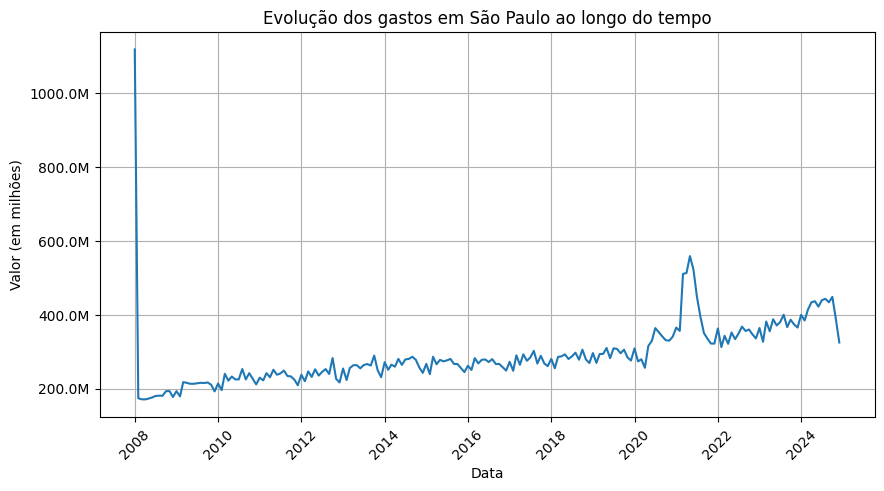

In [17]:
def plot_estado(df, estado):
    
    plt.figure(figsize=(10, 5))
    plt.plot(df["Datas"], df[estado], linestyle='-')

    # Personalizar os eixos
    plt.xlabel("Data")
    plt.ylabel("Valor (em milhões)")
    plt.title(f"Evolução dos gastos em {estado} ao longo do tempo")
    plt.xticks(rotation=45)
    plt.grid()

    # Formatar o eixo Y para exibir valores em milhões
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
    
    # Exibir o gráfico
    plt.show()

# Exemplo de uso:
plot_estado(df_trans, "São Paulo")

In [18]:
#Remove a linha de 2008/01
df_trans = df_trans.drop(index=0).reset_index(drop=True)

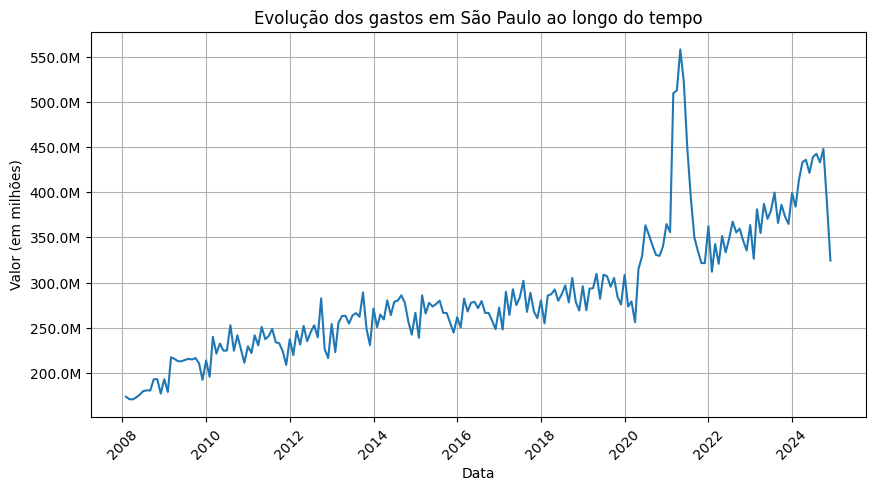

In [19]:
plot_estado(df_trans, "São Paulo")

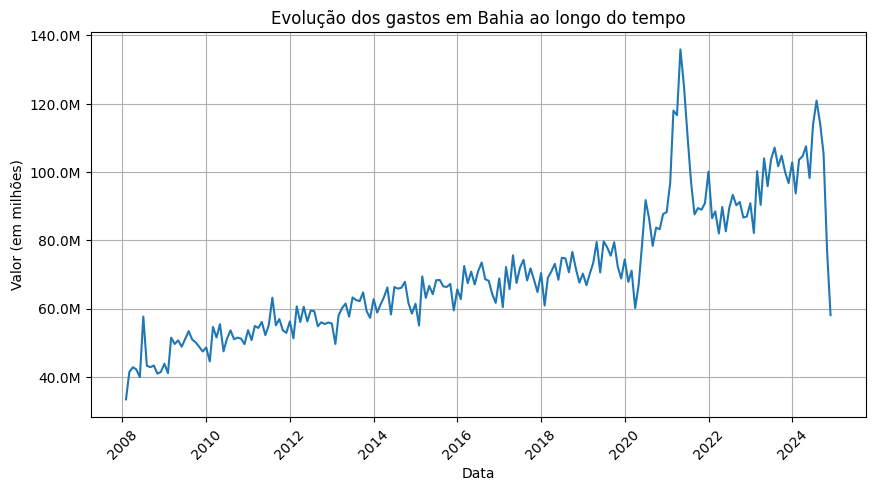

In [20]:
plot_estado(df_trans, "Bahia")

Desafio 1: executar o gráfico anterior com o mês mais recente - ok

Desafio 2: deixar as legendas ânguladas (0, 45 etc) para facilitar a leitura - ok

Desafio 3: reposicionar a legenda. Dentro? Fora? Onde? -- ok

Desafio 4: retocar a nossa visualização. - ok

Desafio 5: colocar títulos nos dois eixos. - ok

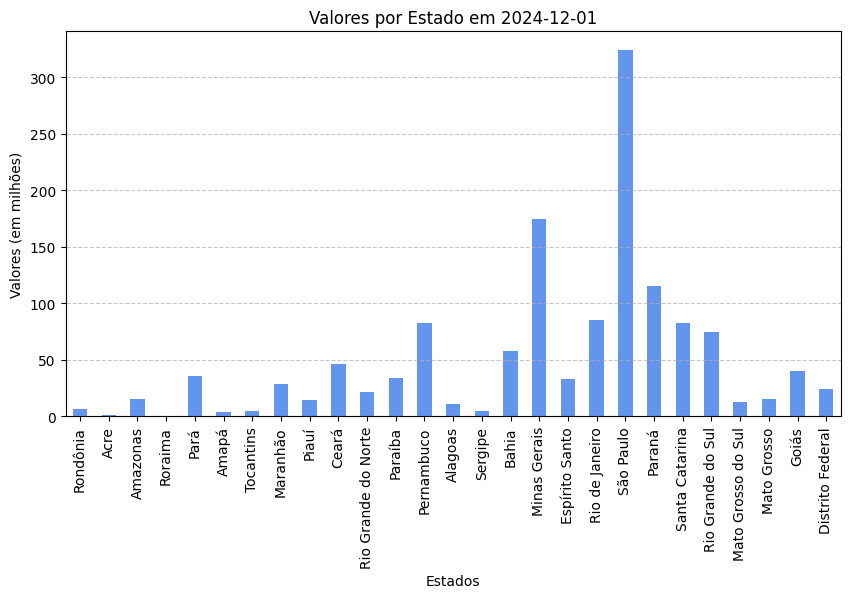

In [ ]:
# Criar uma cópia do dataframe
df_trans_copy = df_trans.copy()

# Definir 'Datas' como índice
df_trans_copy.set_index('Datas', inplace=True)

# Selecionar uma data para visualização
data = df_trans_copy.loc['2024-12-01'] #<--------- Mudar a Data

# Converter os valores para milhões
data = data / 1e6

# Garantir que a data no título fique no formato correto
data_title = data.name.strftime('%Y-%m-%d') if hasattr(data.name, 'strftime') else str(data.name)


plt.figure(figsize=(10, 5))
data.plot(kind='bar', color='cornflowerblue')
plt.xlabel("Estados")
plt.ylabel("Valores (em milhões)")
plt.title(f"Valores por Estado em {data_title}")

# Ajustar o ângulo da legenda (mude o valor de 0, 45, 90 conforme desejado)
plt.xticks(rotation=90, ha="center")  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [22]:
df_trans.describe() 

Columns,Datas,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
count,203,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,...,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02
mean,2016-07-01 07:33:59.408867072,7.657552e+06,3.170963e+06,1.409645e+07,2.405225e+06,3.411991e+07,2.360158e+06,7.294239e+06,2.821289e+07,1.626046e+07,...,2.599856e+07,7.692297e+07,2.864074e+08,1.065208e+08,5.991312e+07,8.913907e+07,1.740600e+07,1.617344e+07,3.557767e+07,1.918394e+07
min,2008-02-01 00:00:00,1.940793e+06,1.341532e+06,7.681661e+06,6.307790e+03,2.012608e+07,1.177746e+06,4.710764e+06,1.345226e+07,9.711680e+06,...,1.003289e+07,4.068667e+07,1.706684e+08,4.885505e+07,2.440957e+07,4.589770e+07,8.279289e+06,7.929895e+06,1.814937e+07,1.021596e+07
25%,2012-04-16 00:00:00,4.611224e+06,2.681513e+06,1.001718e+07,1.705723e+06,2.741312e+07,1.815222e+06,6.324535e+06,2.138067e+07,1.288055e+07,...,1.804737e+07,5.755476e+07,2.403069e+08,7.796897e+07,4.260409e+07,7.120390e+07,1.303031e+07,1.233259e+07,2.806601e+07,1.456167e+07
50%,2016-07-01 00:00:00,7.558088e+06,3.057632e+06,1.308804e+07,2.230544e+06,3.019016e+07,2.009211e+06,7.054459e+06,2.650411e+07,1.504289e+07,...,2.433823e+07,6.840780e+07,2.734772e+08,1.011230e+08,5.523318e+07,8.734427e+07,1.579524e+07,1.470953e+07,3.406709e+07,1.699351e+07
75%,2020-09-16 00:00:00,9.467582e+06,3.443816e+06,1.810143e+07,3.044980e+06,3.847429e+07,2.648633e+06,7.908025e+06,3.284709e+07,1.910097e+07,...,3.299359e+07,8.969039e+07,3.230804e+08,1.285928e+08,7.130853e+07,1.016524e+08,2.094959e+07,1.868166e+07,3.963595e+07,2.299739e+07
max,2024-12-01 00:00:00,1.817568e+07,5.713882e+06,2.779284e+07,5.427227e+06,5.838119e+07,5.779164e+06,1.359626e+07,5.619785e+07,3.292275e+07,...,5.934496e+07,1.504846e+08,5.582082e+08,1.993785e+08,1.357514e+08,1.695516e+08,3.846982e+07,3.897767e+07,7.473149e+07,3.646404e+07
std,NaN,3.308956e+06,8.017316e+05,4.822980e+06,9.686440e+05,9.231768e+06,9.007091e+05,1.490674e+06,8.762735e+06,4.419445e+06,...,1.029454e+07,2.710269e+07,7.069413e+07,3.311038e+07,2.371679e+07,2.186708e+07,5.892733e+06,5.618037e+06,1.064899e+07,6.174205e+06


Desafio 6: ordenar nosso DataFrame para que na primeira linha tenha a linha com maior gasto, e na última com menor gasto (ordenação) ok

obs: como eu fiz a transposição e removi a coluna total não deu para fazer exatamente esse desafio

In [23]:
# Calcular a soma total de cada estado (todas as colunas, exceto 'Datas')
totais_por_estado = df_trans.iloc[:, 1:].sum()

# Ordenar os valores do menor para o maior
totais_por_estado = totais_por_estado.sort_values(ascending=False)

print(totais_por_estado)

Columns
São Paulo              5.814070e+10
Minas Gerais           3.010786e+10
Paraná                 2.162371e+10
Rio Grande do Sul      1.809523e+10
Rio de Janeiro         1.561536e+10
Bahia                  1.424660e+10
Pernambuco             1.255372e+10
Santa Catarina         1.216236e+10
Ceará                  9.637688e+09
Goiás                  7.222266e+09
Pará                   6.926343e+09
Maranhão               5.727217e+09
Espírito Santo         5.277709e+09
Paraíba                4.030053e+09
Rio Grande do Norte    4.005387e+09
Distrito Federal       3.894340e+09
Mato Grosso do Sul     3.533419e+09
Piauí                  3.300873e+09
Mato Grosso            3.283209e+09
Alagoas                3.146376e+09
Amazonas               2.861579e+09
Sergipe                1.891684e+09
Rondônia               1.554483e+09
Tocantins              1.480731e+09
Acre                   6.437055e+08
Roraima                4.882608e+08
Amapá                  4.791121e+08
dtype: float64


Desafio 7: adicionar uma coluna com a região de cada estado - ok

obs: criei um novo df filtrado por região

In [ ]:
# Criar um dicionário mapeando estados para suas regiões
regioes = {
    "Rondônia": "Norte", "Acre": "Norte", "Amazonas": "Norte", "Roraima": "Norte", "Pará": "Norte", "Amapá": "Norte", "Tocantins": "Norte",
    "Maranhão": "Nordeste", "Piauí": "Nordeste", "Ceará": "Nordeste", "Rio Grande do Norte": "Nordeste", "Paraíba": "Nordeste",
    "Pernambuco": "Nordeste", "Alagoas": "Nordeste", "Sergipe": "Nordeste", "Bahia": "Nordeste",
    "Minas Gerais": "Sudeste", "Espírito Santo": "Sudeste", "Rio de Janeiro": "Sudeste", "São Paulo": "Sudeste",
    "Paraná": "Sul", "Santa Catarina": "Sul", "Rio Grande do Sul": "Sul",
    "Mato Grosso do Sul": "Centro-Oeste", "Mato Grosso": "Centro-Oeste", "Goiás": "Centro-Oeste", "Distrito Federal": "Centro-Oeste"
}

# Criar um novo DataFrame agrupado por região
df_regioes = df_trans.groupby(by=regioes, axis=1).sum()

df_regioes.head()

C:\Users\Phillipe\AppData\Local\Temp\ipykernel_31632\3909306010.py:12: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_regioes = df_trans.groupby(by=regioes, axis=1).sum()


Columns,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
0,44574514.79,1.431702e+08,38844188.02,2.981557e+08,1.191623e+08
1,51830387.75,1.641006e+08,42058042.63,3.052635e+08,1.360240e+08
2,51359623.44,1.695470e+08,43806481.51,3.074930e+08,1.358942e+08
3,50283669.63,1.694081e+08,45231240.95,3.078195e+08,1.356085e+08
4,52250608.11,1.613882e+08,44643930.10,3.116140e+08,1.388477e+08


Desafio 8: adicione seu estado nessa lista de 7 estados (dados_dos_7_estados) - ok

Desafio 9: adicionar seu estado aos 5 estados existentes, e plotar. - ok

Desafio 10: adicionar seu estado. - ok

Desafio 11: deixar o gráfico mais refinado. - ok

Desafio 12: pesquisar o sort_index. - ok


obs: como meu estado já tava na lista, eu coloquei o 7º sendo um estado aleatório

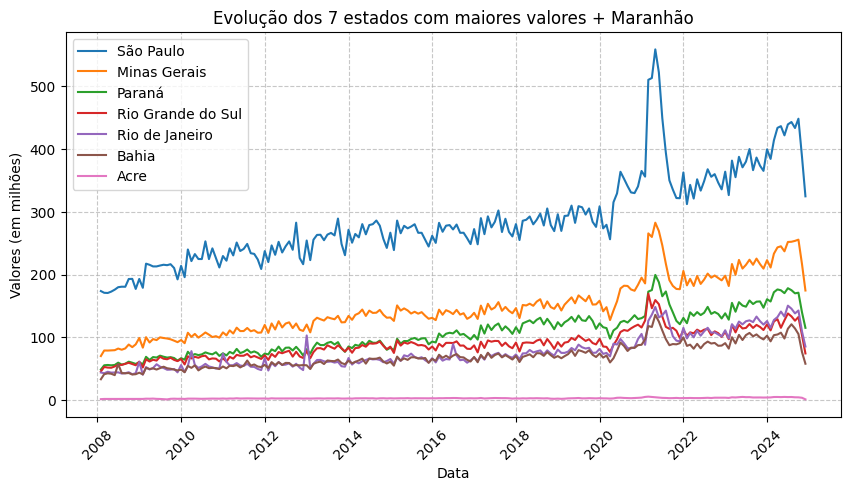

In [ ]:
# Selecionar os 7 estados com maiores valores
top_7_estados = list(totais_por_estado.head(7).index)

# Substituir o 7º estado por um aleatório que não esteja no top 7
estados_disponiveis = list(set(totais_por_estado.index) - set(top_7_estados))
estado_aleatorio = np.random.choice(estados_disponiveis)
top_7_estados[-1] = estado_aleatorio  # Substituir o último pelo aleatório


df_top7 = df_trans[['Datas'] + top_7_estados].set_index('Datas') / 1e6


plt.figure(figsize=(10, 5))
for estado in df_top7.columns:
    plt.plot(df_top7.index, df_top7[estado], label=estado)

plt.xlabel("Data")
plt.ylabel("Valores (em milhões)")
plt.title("Evolução dos 7 estados com maiores valores + Maranhão")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Desafio 13: googlar os casos de dengue do Brasil e verificar se existe algum padrão com os gastos encontrados aqui. +-

obs: Ao procurar sobre dengue no google, existem diversos sites com informações sobre a dengue ao nível estadual, porém não consegui achar um que pegasse todo o Brasil; É possível que a dengue aumente o valor gasto em alguns meses do ano, porém não é possível afirmar isso com base nos dados que temos disponível.

Desafio 14: plotar somente os estados de uma região do Brasil. - ok

Desafio 15: padronizar os ticks verticais para espaçamento de 12 em 12 unidades (uma vez ao ano). - ok

Desafio 16: escolher e utilizar outras cores para saltar mais aos olhos. - ok

Desafio 17: colocar uma grade (grid) horizontal e vertical que não seja intrusivo. - ok

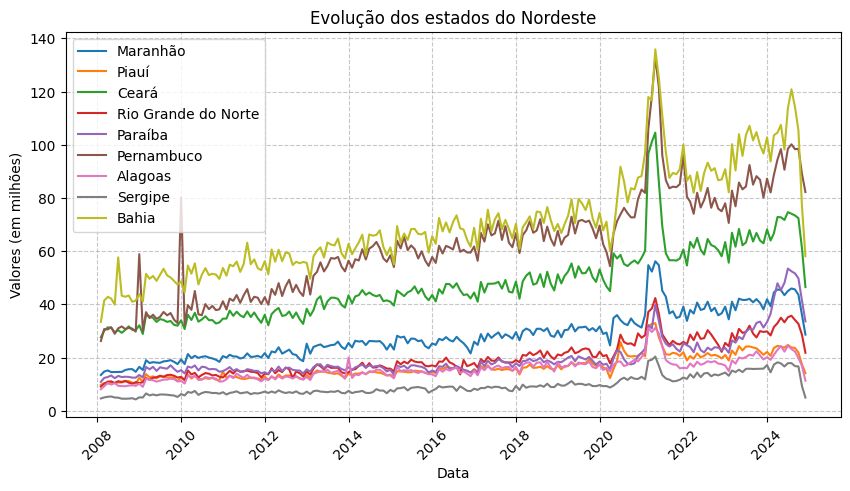

In [ ]:
# Lista de estados do Nordeste
estados_nordeste = [
    "Maranhão", "Piauí", "Ceará", "Rio Grande do Norte", "Paraíba",
    "Pernambuco", "Alagoas", "Sergipe", "Bahia"
]


df_nordeste = df_trans[['Datas'] + estados_nordeste].set_index('Datas') / 1e6


plt.figure(figsize=(10, 5))
for estado in df_nordeste.columns:
    plt.plot(df_nordeste.index, df_nordeste[estado], label=estado)


plt.xlabel("Data")
plt.ylabel("Valores (em milhões)")
plt.title("Evolução dos estados do Nordeste")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Desafio 18: passar uma linha horizontal no seu estado. Anotando o gráfico com uma linha. - ok 

Desafio 19: Atualizar o último gráfico para refletir seu estado, incluindo grid, eixos etc. - ok 

Desafio 20: Colorir o seu estado com um tom diferente. Colorir os outros estados de acordo com gasto maior ou menor. - ok 

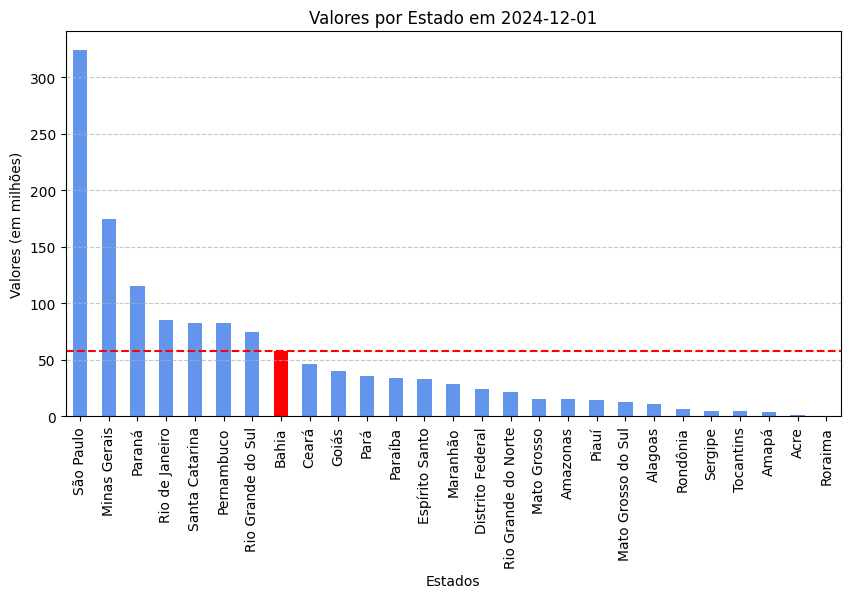

In [ ]:
# Selecionar uma data para visualização
data = df_trans_copy.loc['2024-12-01']  # <--------- Mudar a Data

data = (data / 1e6).sort_values(ascending=False)
data_title = data.name.strftime('%Y-%m-%d') if hasattr(data.name, 'strftime') else str(data.name)

# Definir cores personalizadas, destacando a Bahia
cores = ['red' if estado == 'Bahia' else 'cornflowerblue' for estado in data.index]

plt.figure(figsize=(10, 5))
bars = data.plot(kind='bar', color=cores)

# Adicionar uma linha sobre a barra da Bahia
if 'Bahia' in data.index:
    plt.axhline(y=data['Bahia'], color='red', linestyle='--', linewidth=1.5)

plt.xlabel("Estados")
plt.ylabel("Valores (em milhões)")
plt.title(f"Valores por Estado em {data_title}")
plt.xticks(rotation=90, ha="center")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Desafio 21: gasto por população de dois estados. Escolher dois estados, plotar a comparação desses gastos de acordo com a população deles. (base IBGE por exemplo) - ok

Desafio 22: Explore gráficos e as tabelas, encontre o que você acha de interessante, levante perguntas e hipóteses. - ok

Desafio 23: Escolha outro valor além de "Valor Aprovado" no tabnet. - ok

In [48]:
df_pop = pd.read_csv('C:/Users/Phillipe/Projetos/FIAP ATIVIDADES/AULA 1/populacao total.csv', skiprows=4, sep=';', skipfooter=21)
df_pop

C:\Users\Phillipe\AppData\Local\Temp\ipykernel_31632\155411471.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df_pop = pd.read_csv('C:/Users/Phillipe/Projetos/FIAP ATIVIDADES/AULA 1/populacao total.csv', skiprows=4, sep=';', skipfooter=21)


,Unidade da Federação,Total
0,Rondônia,1581196
1,Acre,830018
2,Amazonas,3941613
3,Roraima,636707
4,Pará,8120131
5,Amapá,733759
6,Tocantins,1511460
7,Maranhão,6776699
8,Piauí,3271199
9,Ceará,8794957


In [ ]:
# Converter totais_por_estado para DataFrame
df_totais = totais_por_estado.reset_index()
df_totais.columns = ['Unidade da Federação', 'Total_Valores']

# Fazer o merge com df_pop
df_merged = df_totais.merge(df_pop, on='Unidade da Federação', how='left')


df_merged["Valor_per_capita"] = df_merged["Total_Valores"] / df_merged["Total"]

df_merged

,Unidade da Federação,Total_Valores,Total,Valor_per_capita
0,São Paulo,5.814070e+10,44411238,1309.143821
1,Minas Gerais,3.010786e+10,20539989,1465.816795
2,Paraná,2.162371e+10,11444380,1889.461425
3,Rio Grande do Sul,1.809523e+10,10882965,1662.711457
4,Rio de Janeiro,1.561536e+10,16055174,972.606309
5,Bahia,1.424660e+10,14141626,1007.422948
6,Pernambuco,1.255372e+10,9058931,1385.783937
7,Santa Catarina,1.216236e+10,7610361,1598.132354
8,Ceará,9.637688e+09,8794957,1095.819757
9,Goiás,7.222266e+09,7056495,1023.491986


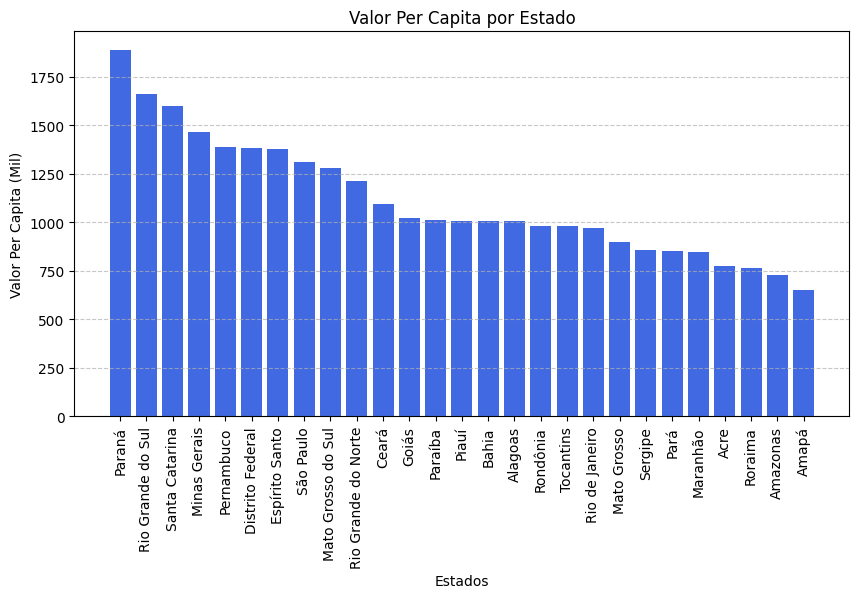

In [ ]:
# Ordenar o DataFrame pelo Valor_per_capita
df_merged_sorted = df_merged.sort_values(by="Valor_per_capita", ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(df_merged_sorted["Unidade da Federação"], df_merged_sorted["Valor_per_capita"], color='royalblue')
plt.xlabel("Estados")
plt.ylabel("Valor Per Capita (Mil)")
plt.title("Valor Per Capita por Estado")
plt.xticks(rotation=90, ha="center")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()